# Kernel SVM

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MachineLearning/Part3_Classification/Section17_Kernel_SVM/Python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MachineLearning/Part3_Classification/Section17_Kernel_SVM/Python


## Importing the dataset

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

len(X_train), len(X_test), len(y_train), len(y_test)

(300, 100, 300, 100)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler 

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## Training the Kernel SVM model on the Training set

In [9]:
from sklearn.svm import SVC

classifier_rbf = SVC(kernel='rbf', random_state=0)
classifier_rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [10]:
from sklearn.svm import SVC

classifier_poly = SVC(kernel='poly',degree=2, coef0=0.0, random_state=0)
classifier_poly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting a new result

In [11]:
classifier_rbf.predict(sc_X.transform([[30, 20000]]))

array([0])

## Predicting the Test set results

In [24]:
y_pred_rbf = classifier_rbf.predict(X_test)

In [25]:
y_pred_poly = classifier_poly.predict(X_test)

## Making the Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

cf_matrix = confusion_matrix(y_test, y_pred_rbf)
accuracy = accuracy_score(y_test, y_pred_rbf)

cf_matrix, accuracy

(array([[64,  4],
        [ 3, 29]]), 0.93)

In [27]:
cf_matrix = confusion_matrix(y_test, y_pred_poly)
accuracy = accuracy_score(y_test, y_pred_poly)

cf_matrix, accuracy

(array([[61,  7],
        [17, 15]]), 0.76)

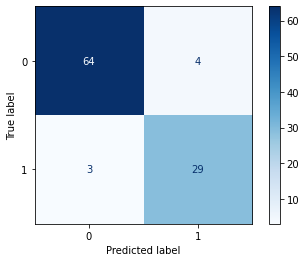

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier_rbf, X_test, y_test, cmap="Blues")

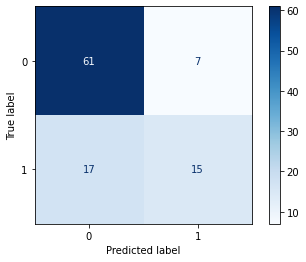

In [18]:
plot_confusion_matrix(classifier_poly, X_test, y_test, cmap="Blues")

## Visualising the Training set results

No handles with labels found to put in legend.


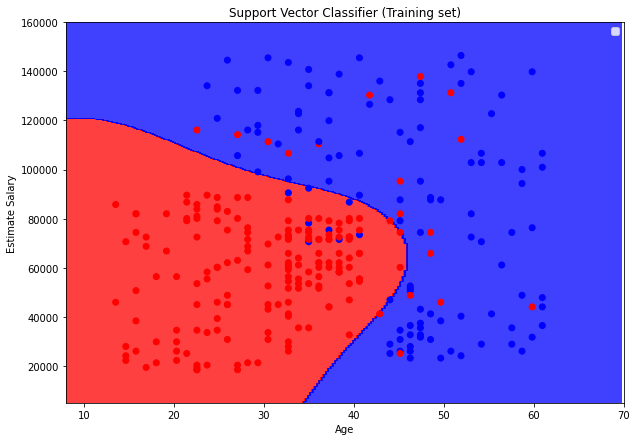

In [21]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc_X.inverse_transform(X_train), y_train

X1_min, X1_max = X[:,0].min()-10, X[:,0].max()+10
X2_min, X2_max = X[:,1].min()-10000, X[:,1].max()+10000

X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, step=0.25),
                     np.arange(X2_min, X2_max, step=0.25))

X_in = np.array([X1.ravel(), X2.ravel()]).T
X_in = sc_X.transform(X_in)
# predict 
y_pred = classifier_rbf.predict(X_in).reshape(X1.shape)
# plotting
plt.figure(figsize=(10,7))
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)

plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(("red","blue")))
plt.scatter(X_set[:,0], X_set[:,1], c=y_train, cmap=ListedColormap(("red", "blue")))

plt.title("Support Vector Classifier (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimate Salary")
plt.legend()
plt.show()

No handles with labels found to put in legend.


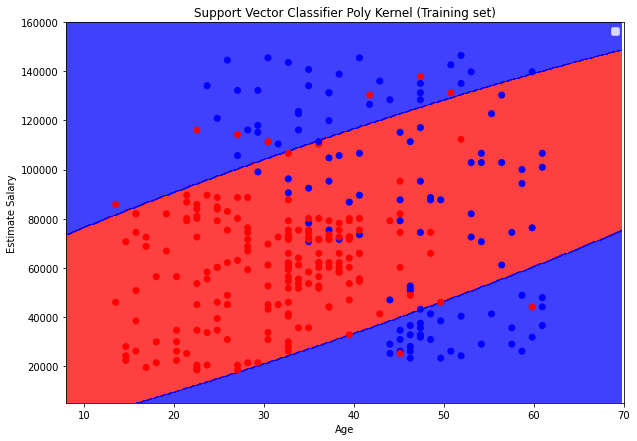

In [22]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc_X.inverse_transform(X_train), y_train

X1_min, X1_max = X[:,0].min()-10, X[:,0].max()+10
X2_min, X2_max = X[:,1].min()-10000, X[:,1].max()+10000

X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, step=0.25),
                     np.arange(X2_min, X2_max, step=0.25))

X_in = np.array([X1.ravel(), X2.ravel()]).T
X_in = sc_X.transform(X_in)
# predict 
y_pred = classifier_poly.predict(X_in).reshape(X1.shape)
# plotting
plt.figure(figsize=(10,7))
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)

plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(("red","blue")))
plt.scatter(X_set[:,0], X_set[:,1], c=y_train, cmap=ListedColormap(("red", "blue")))

plt.title("Support Vector Classifier Poly Kernel (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimate Salary")
plt.legend()
plt.show()

## Visualising the Test set results